#**HEART DISEASE DATASET(STAGE-1)**

##**DATA ACQUISITION**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
hr=pd.read_csv('heart_dataset.csv',on_bad_lines='skip') 
hr=hr.rename(columns={'age':'AGE','sex':'SEX','cp':'CP','trestbps':'RBP','chol':'SCH','fbs':'FBS','restecg':'RES','thalach':'MHR','exang':'EIA','oldpeak':'OPK','slope':'PES','ca':'VCA','thal':'THA','target':'LB'})
hr.head()

,AGE,SEX,CP,RBP,SCH,FBS,RES,MHR,EIA,OPK,PES,VCA,THA,LB
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
hr.tail()

,AGE,SEX,CP,RBP,SCH,FBS,RES,MHR,EIA,OPK,PES,VCA,THA,LB
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


**DATA PREPROCESSING**

In [ ]:
hr=hr.replace('?',np.NaN)

In [ ]:
hr.isnull().sum()

AGE    0
SEX    0
CP     0
RBP    0
SCH    0
FBS    0
RES    0
MHR    0
EIA    0
OPK    0
PES    0
VCA    0
THA    0
LB     0
dtype: int64

In [ ]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     1025 non-null   int64  
 1   SEX     1025 non-null   int64  
 2   CP      1025 non-null   int64  
 3   RBP     1025 non-null   int64  
 4   SCH     1025 non-null   int64  
 5   FBS     1025 non-null   int64  
 6   RES     1025 non-null   int64  
 7   MHR     1025 non-null   int64  
 8   EIA     1025 non-null   int64  
 9   OPK     1025 non-null   float64
 10  PES     1025 non-null   int64  
 11  VCA     1025 non-null   int64  
 12  THA     1025 non-null   int64  
 13  LB      1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
hr.dtypes

AGE      int64
SEX      int64
CP       int64
RBP      int64
SCH      int64
FBS      int64
RES      int64
MHR      int64
EIA      int64
OPK    float64
PES      int64
VCA      int64
THA      int64
LB       int64
dtype: object

In [ ]:
hr.describe()

,AGE,SEX,CP,RBP,SCH,FBS,RES,MHR,EIA,OPK,PES,VCA,THA,LB
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='LB', ylabel='Density'>

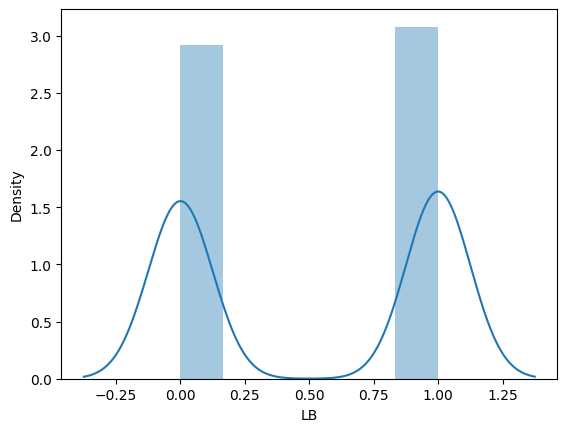

In [ ]:
sns.distplot(hr['LB'])

**OUTLIER DETECTION AND REMOVAL**

In [ ]:
import plotly.express as px
labels=["Healthy","Not Healthy"]
healthy_or_not = hr['LB'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]
print(values)
fig = px.pie(values=hr['LB'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"],title="Healthy vs Heart Disease")
fig.show()


[526, 499]


<Axes: >

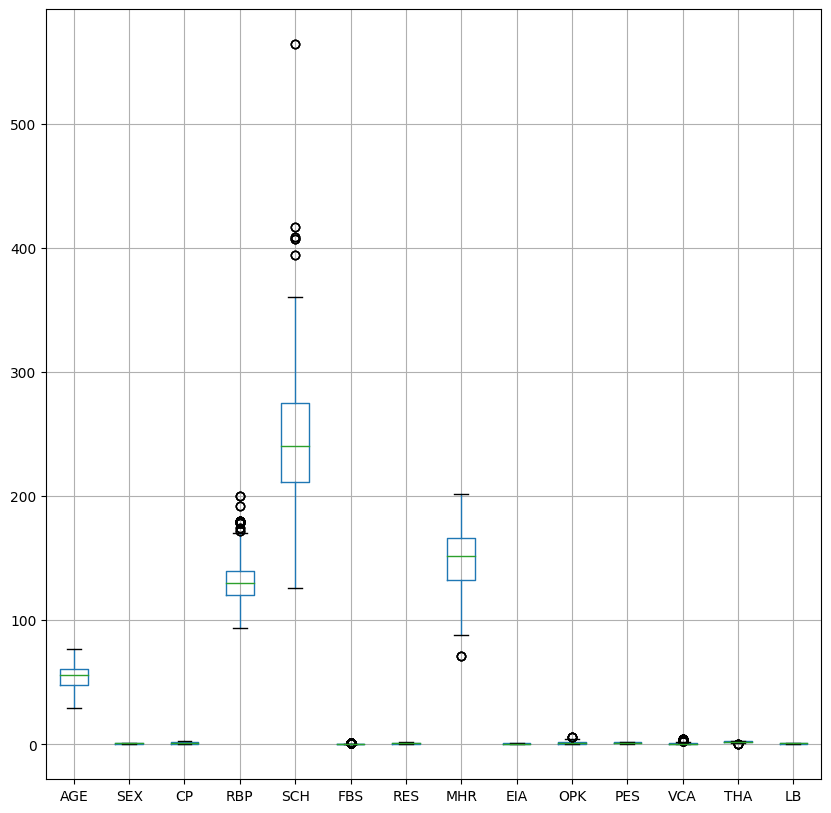

In [ ]:
hr.boxplot(figsize=(10,10))

<Axes: >

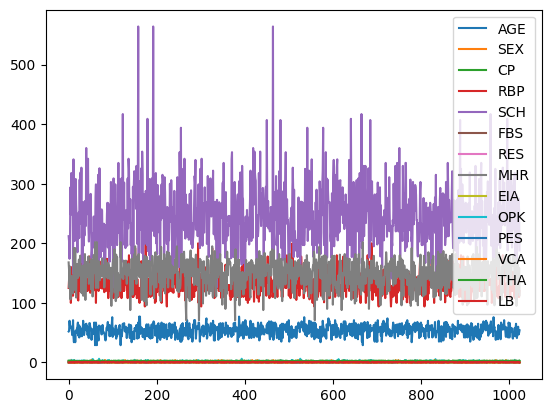

In [ ]:
hr.plot()

In [ ]:
columns = ['AGE', 'RBP', 'SCH', 'MHR', 'OPK','SEX', 'CP', 'FBS', 'RES', 'EIA', 'PES','VCA','THA','LB']

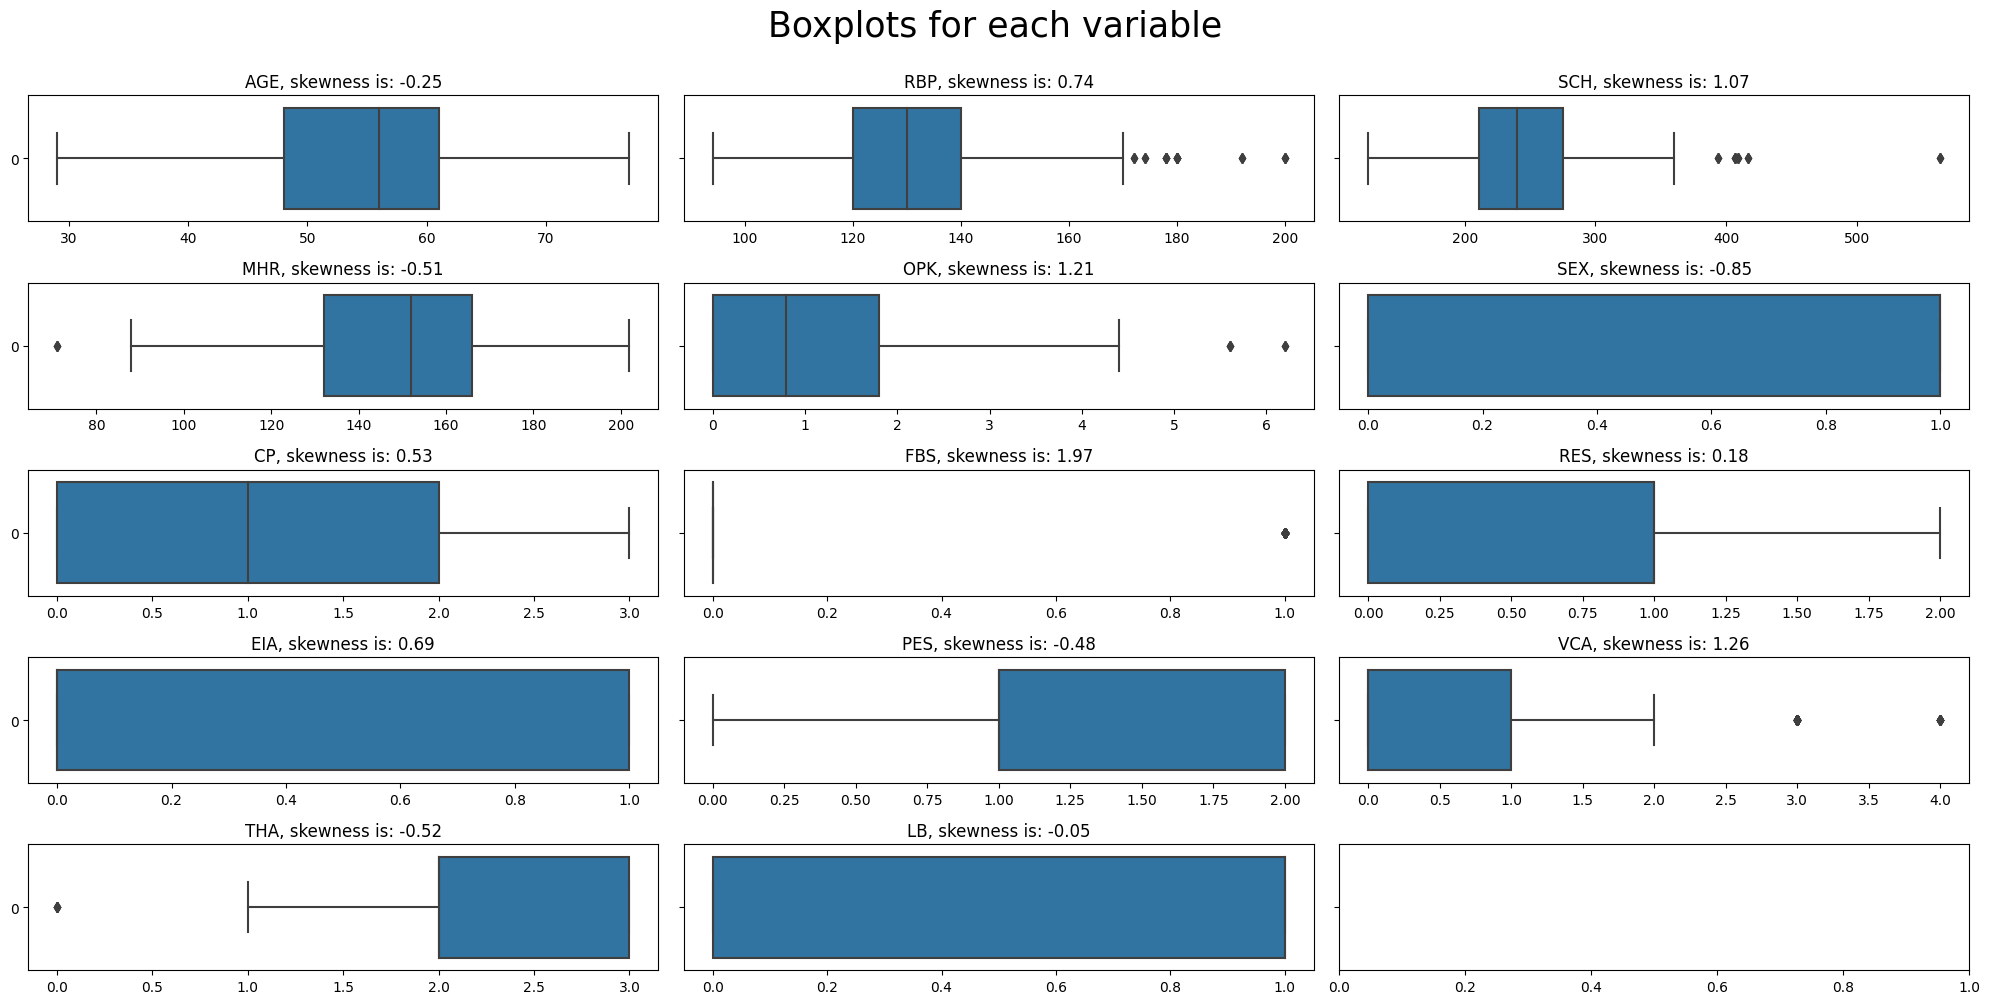

In [ ]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20,10)) #create a figure with multiple subplots arranged in a grid
    #fig, which represents the entire figure, and an array of Axes objects axs, which represent the individual subplots
    fig.suptitle(suptitle,y=1, size=25) #y-coordinate is 1 and font size is 25 pts
    axs = axs.flatten() #flatten() method returns a new 1D array that contains all the elements of the original 2D array in row-major order.
    for i, data in enumerate(columns_list):
        #orient='h' argument specifies that the boxplot should be horizontal, with the column names displayed on the y-axis
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        #Skewness is a measure of the asymmetry of the data distribution. A skewness value of 0 indicates a perfectly symmetrical distribution, while positive or negative values indicate a right or left skew, respectively
boxplots_custom(dataset=hr, columns_list=columns, rows=5, cols=3, suptitle='Boxplots for each variable') #suptitle-a secondary or explanatory title
plt.tight_layout()

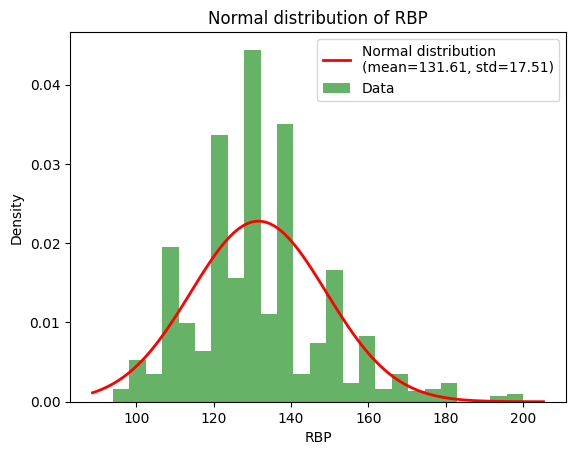

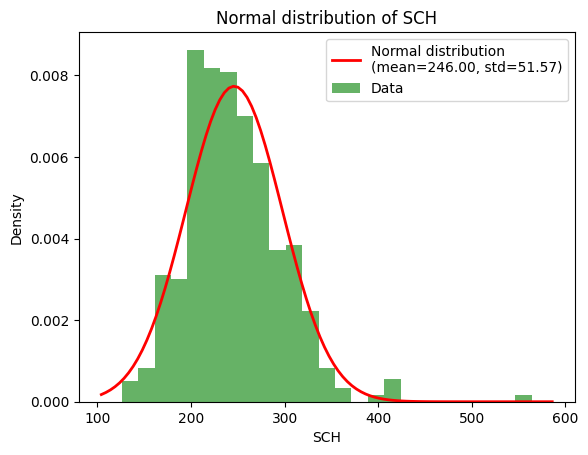

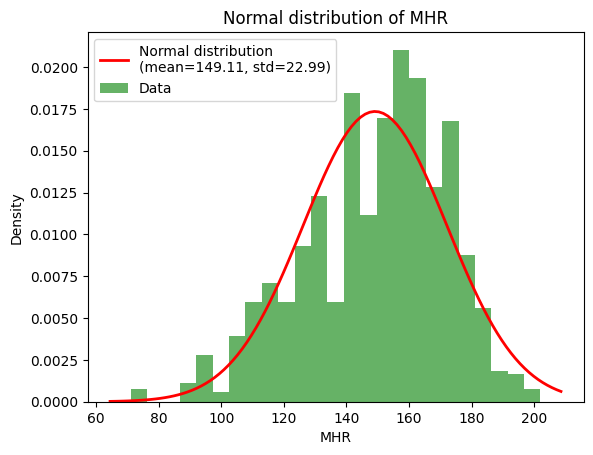

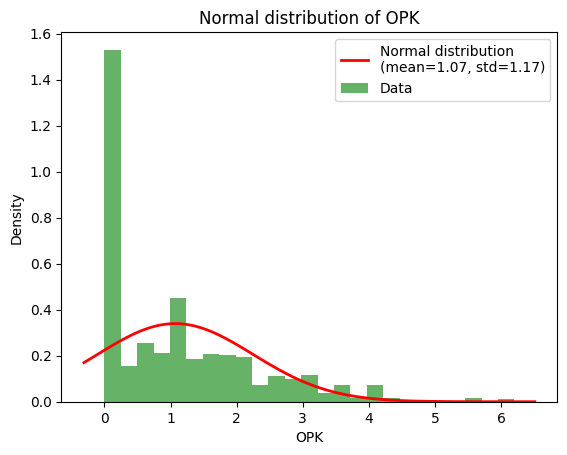

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
columns = ['RBP', 'SCH', 'MHR', 'OPK']
for column in columns:
    mu, std = norm.fit(hr[column])
    plt.hist(hr[column], bins=25, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x, mu, std)
    plt.plot(x, y, 'r', linewidth=2)
    plt.legend([f'Normal distribution\n(mean={mu:.2f}, std={std:.2f})', 'Data'])
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Normal distribution of {column}')
    plt.show()


In [ ]:
from scipy.stats import shapiro
columns = ['RBP', 'SCH', 'VCA', 'OPK']
for col in columns:
  stat, p = shapiro(hr)
  alpha = 0.05
  if p > alpha:
    print("The data is normally distributed")
  else:
    print("The data is not normally distributed")


The data is not normally distributed
The data is not normally distributed
The data is not normally distributed
The data is not normally distributed


In [ ]:
def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        df[col][z_scores > threshold] = np.nan
    df.dropna(inplace=True)
columns = ['RBP', 'SCH', 'MHR', 'OPK','FBS','VCA','THA']
remove_outliers_zscore(hr, columns)


In [ ]:
hr.shape

(969, 14)

#**DATA PREDICTION**

##**STAGE-1**

In [ ]:
X=hr.iloc[:,:-1].values
y=hr.iloc[:,-1].values
print(X.shape,y.shape)

(969, 13) (969,)


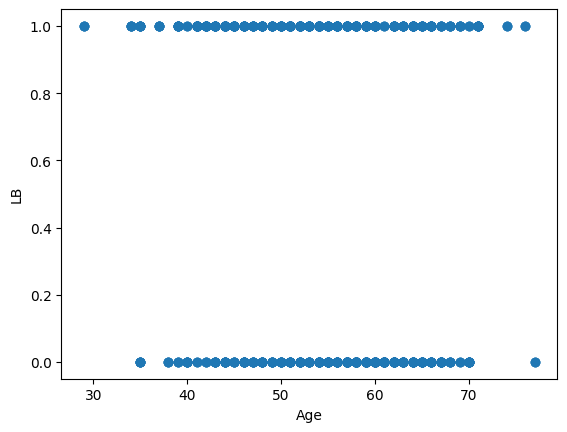

In [ ]:
plt.scatter(X[:,0],y)
plt.xlabel('Age')
plt.ylabel('LB')
plt.show()

In [ ]:
Xdf=pd.DataFrame(X)
Xdf.shape


(969, 13)

In [ ]:
Xdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0


In [ ]:
y.shape

(969,)

In [ ]:
ydf=pd.DataFrame(y)
ydf.head(20)

,0
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


##**MACHINE LEARNING ALGORITHMS**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
models=[]
models.append(('NB',GaussianNB()))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(8,7),random_state=5,verbose=False,learning_rate_init=0.01)))
models.append(('DT',DecisionTreeClassifier(criterion='entropy',max_depth=6)))
models.append(('RF',RandomForestClassifier(n_estimators=20,random_state=7,max_depth=7)))
models.append(('SVM',SVC(kernel='linear')))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
model_param=[]
model_param.append(('param_grid_NB', {'var_smoothing': np.logspace(0,-9, num=100)}))
model_param.append(('param_grid_MLP' , {'hidden_layer_sizes': [(10,), (20,), (30,)],'activation': ['logistic', 'relu','sigmoid'],'alpha': [0.0001, 0.001, 0.01]}))
model_param.append(('param_grid_DT',{'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 6, 8],'criterion':['entropy','gini']}))
model_param.append(('param_grid_RF',{'n_estimators': [10, 20, 30],'max_depth': [5, 6, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}))
model_param.append(('param_grid_SVC', {'C': [0.1, 1, 10], 'kernel': ['linear','rbf'], 'gamma': ['scale', 'auto']}))


In [ ]:
models_new=[]
models_new.append(('NB',GaussianNB(var_smoothing = 8.111308307896872e-05)))
models_new.append(('MLP',MLPClassifier(activation= 'logistic', alpha = 0.01, hidden_layer_sizes = (10,8),learning_rate_init=0.01,random_state=5)))
models_new.append(('DT',DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf= 20, min_samples_split=20,random_state=5)))
models_new.append(('RF',RandomForestClassifier(n_estimators=15,min_samples_leaf=1, min_samples_split= 2,max_depth=3,random_state=5)))
models_new.append(('SVM',SVC(kernel='linear',gamma = 20,C= 0.0001,random_state=5)))

## **BASELINE IMPLEMENTATION**

**10(k)-fold**

In [ ]:
import time
accuracy=dict()
precision=dict()
recall=dict()
tt=dict()

from sklearn.model_selection import cross_val_score,KFold
for name,model in models_new:
    st=time.time()
    kfold=KFold(n_splits=10)
    acc=cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    accuracy[name]=(acc.mean())
    et=time.time()
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)


ACCURACY:
NB 0.8441365979381444
MLP 0.8420747422680412
DT 0.8400021477663231
RF 0.8616731099656357
SVM 0.7141000859106529

Time(10-K):
NB 0.030173063278198242
MLP 1.9786860942840576
DT 0.04632973670959473
RF 0.5082981586456299
SVM 0.5280077457427979


**VARIANCE AND STANDARD DEVIATION**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True)
variances = dict()
std_devs = dict()
for name, model in models_new:
    fold_variances = []
    fold_std_devs = []
    for fold_num, (train_indices, test_indices) in enumerate(kf.split(X)):
        model.fit(X[train_indices], y[train_indices])
        y_pred = model.predict(X[test_indices])
        mse = mean_squared_error(y[test_indices], y_pred)
        variance = np.var(y[test_indices] - y_pred)
        std_dev = np.sqrt(mse)
        fold_variances.append(variance)
        fold_std_devs.append(std_dev)
    variances[name] = (np.mean(fold_variances))/10
    std_devs[name] = (np.mean(fold_std_devs))/10

print("\nVariance:")
for key, value in variances.items():
    print(key, value)
print("\nStandard Deviation:")
for key, value in std_devs.items():
    print(key, value)



Variance:
NB 0.014661059663435427
MLP 0.014715769582130292
DT 0.015531363546537886
RF 0.012742043369933929
SVM 0.02826601774232118

Standard Deviation:
NB 0.038919266371289875
MLP 0.03848244811368166
DT 0.03972080185935981
RF 0.03547128971921622
SVM 0.05352444909550132




**50-50**

In [ ]:
accuracy=dict()
precision=dict()
recall=dict()
tt=dict()

from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import time

for name,model in models_new:
    st=time.time()
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=43)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()

    from sklearn.preprocessing import StandardScaler 
    st_x= StandardScaler() 
    x_train= st_x.fit_transform(x_train)

    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.8144329896907216
MLP 0.8391752577319588
DT 0.8185567010309278
RF 0.8515463917525773
SVM 0.6804123711340206

Time(10-K):
NB 0.004309415817260742
MLP 0.1522977352142334
DT 0.0023217201232910156
RF 0.028908491134643555
SVM 0.013538360595703125


**60-40**

In [ ]:
accuracy=dict()
precision=dict()
recall=dict()
tt=dict()

from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import time

for name,model in models_new:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()

    from sklearn.preprocessing import StandardScaler 
    st_x= StandardScaler() 
    x_train= st_x.fit_transform(x_train)

    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st
print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.8273195876288659
MLP 0.8273195876288659
DT 0.8170103092783505
RF 0.8582474226804123
SVM 0.6804123711340206

Time(10-K):
NB 0.003386259078979492
MLP 0.09986686706542969
DT 0.0017554759979248047
RF 0.02889561653137207
SVM 0.01606273651123047


**70-30**

In [ ]:
accuracy=dict()
precision=dict()
recall=dict()
tt=dict()
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import time
for name,model in models_new:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    from sklearn.preprocessing import StandardScaler 
    st_x= StandardScaler() 
    x_train= st_x.fit_transform(x_train)
    tt[name]=et-st
    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
   

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)
print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.8316151202749141
MLP 0.8694158075601375
DT 0.8419243986254296
RF 0.865979381443299
SVM 0.7010309278350515

Time(10-K):
NB 0.0036766529083251953
MLP 0.18903374671936035
DT 0.0018465518951416016
RF 0.03043508529663086
SVM 0.019280672073364258


**80-20**

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import time
accuracy=dict()
precision=dict()
recall=dict()
f1score=dict()
roc=dict()
tt=dict()
for name,model in models_new:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()

    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    precision[name]=metrics.precision_score(y_test, y_pred,average='micro')
    f1score[name]=metrics.f1_score(y_test,y_pred)
    recall[name]=metrics.recall_score(y_test, y_pred,average='micro')
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc[name]=auc(fpr, tpr)
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nPRECISION:")
for key,value in precision.items():
    print(key,value)

print("\nRECALL:")
for key,value in recall.items():
    print(key,value)

print("\nF1 SCORE:")
for key,value in f1score.items():
    print(key,value)

print("\nROC:")
for key,value in roc.items():
    print(key,value)

print("\nTime(10-K):")
for key,value in tt.items():
    print(key,value)


ACCURACY:
NB 0.865979381443299
MLP 0.8711340206185567
DT 0.8298969072164949
RF 0.8762886597938144
SVM 0.7474226804123711

PRECISION:
NB 0.865979381443299
MLP 0.8711340206185567
DT 0.8298969072164949
RF 0.8762886597938144
SVM 0.7474226804123711

RECALL:
NB 0.865979381443299
MLP 0.8711340206185567
DT 0.8298969072164949
RF 0.8762886597938144
SVM 0.7474226804123711

F1 SCORE:
NB 0.8785046728971964
MLP 0.8847926267281105
DT 0.8465116279069768
RF 0.8878504672897195
SVM 0.7609756097560977

ROC:
NB 0.8631959970190566
MLP 0.8677206430320451
DT 0.8268391355264558
RF 0.8735228361545831
SVM 0.746353667624827

Time(10-K):
NB 0.0026116371154785156
MLP 0.21768999099731445
DT 0.0020220279693603516
RF 0.03448295593261719
SVM 0.022256851196289062



##**VOTING IMPLEMENTATION**

In [ ]:
from sklearn.ensemble import VotingClassifier
nb1 = GaussianNB(priors=[0.4, 0.6], var_smoothing=1e-9)
nb2 = GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-8)
nb3 = GaussianNB(priors=[0.2, 0.8], var_smoothing=1e-10)
voting_clfnb = VotingClassifier(estimators=[('naivebayes1', nb1), ('naivebayes2', nb2), ('naivebayes3', nb3)], voting='hard')

In [ ]:
mlp1 = MLPClassifier(hidden_layer_sizes=(8,7),random_state=5,verbose=False,learning_rate_init=0.01,max_iter=1000)
mlp2 = MLPClassifier(hidden_layer_sizes=(7,6),random_state=5,verbose=False,learning_rate_init=0.01,max_iter=1000)
voting_clfmlp = VotingClassifier(estimators=[('multilp1', mlp1), ('multilp2', mlp2)], voting='hard')

In [ ]:
clf1 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=10, max_depth=3)
clf2 = DecisionTreeClassifier(criterion='gini',min_samples_leaf=15, max_depth=5)
clf3 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=20, max_depth=4)
voting_clfdt = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2), ('clf3', clf3)], voting='hard')

In [ ]:
rfc1 = RandomForestClassifier(n_estimators=5, max_depth=3, min_samples_leaf=6,random_state=7)
rfc2 = RandomForestClassifier(n_estimators=10, max_depth=4,min_samples_leaf=5, random_state=7)
rfc3 = RandomForestClassifier(n_estimators=15, max_depth=5,min_samples_leaf=4, random_state=7)
voting_clfrf = VotingClassifier(estimators=[('rf1', rfc1), ('rf2', rfc2), ('rf3', rfc3)], voting='hard')

In [ ]:
svm1 = SVC(kernel='linear', C=0.01,gamma=10)
svm2 = SVC(kernel='rbf', gamma=20.0, C=0.001)
svm3 = SVC(kernel='poly', degree=2, C=0.1)
voting_clfsvm = VotingClassifier(estimators=[('svm1', svm1), ('svm2', svm2), ('svm3', svm3)], voting='hard')

In [ ]:
votingmodel=[]
votingmodel.append(('MLP',VotingClassifier(estimators=[('multilp1', mlp1), ('multilp2', mlp2)], voting='hard')))
votingmodel.append(('DT',VotingClassifier(estimators=[('clf1', clf1), ('clf3', clf3)], voting='hard')))
votingmodel.append(('RF',VotingClassifier(estimators=[('rf1', rfc1), ('rf2', rfc2), ('rf3', rfc3)], voting='hard')))
votingmodel.append(('SVC',VotingClassifier(estimators=[('svm1', svm1), ('svm2', svm2), ('svm3', svm3)], voting='hard')))

**10(K)-Fold**

In [ ]:
def votingclffold(voting_clf): 
  kfold = KFold(n_splits=10, shuffle=True, random_state=42) 
  scores = cross_val_score(voting_clf, X, y, cv=kfold)
  accuracy=scores.mean()
  return accuracy

print("Voting(10-fold)- NB ",votingclffold(voting_clfnb))
print("Voting(10-fold)- MLP ",votingclffold(voting_clfmlp))
print("Voting(10-fold)- DT ",votingclffold(voting_clfdt))
print("Voting(10-fold)- RF ",votingclffold(voting_clfrf))
print("Voting(10-fold)- SVC ",votingclffold(voting_clfsvm))

Voting(10-fold)- NB  0.8349012027491408
Voting(10-fold)- MLP  0.8265571305841923
Voting(10-fold)- DT  0.8524591924398626
Voting(10-fold)- RF  0.8844394329896907
Voting(10-fold)- SVC  0.7018256013745704


**50-50**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=43)
traindf=pd.DataFrame(x_train)
traindf.shape

(484, 13)

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:100], y_train[:100])
nb2.fit(X_train_df.iloc[100:250], y_train[100:250])
nb3.fit(X_train_df.iloc[250:484], y_train[250:484])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3', nb3)], voting='hard')
ensemble.fit(X_train_df, y_train)
accuracy = ensemble.score(x_test, y_test)
print("Voting(50-50)- NB ",(accuracy))

Voting(50-50)- NB  0.8164948453608247


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

def votingclf_fiftysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

print("Voting(50-50)- MLP ",votingclf_fiftysplit(voting_clfmlp))
print("Voting(50-50)- DT ",votingclf_fiftysplit(voting_clfdt))
print("Voting(50-50)- RF ",votingclf_fiftysplit(voting_clfrf))
print("Voting(50-50)- SVC ",votingclf_fiftysplit(voting_clfsvm))

Voting(50-50)- MLP  0.845360824742268
Voting(50-50)- DT  0.8268041237113402
Voting(50-50)- RF  0.8783505154639175
Voting(50-50)- SVC  0.6783505154639176


**60-40**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=43)
traindf=pd.DataFrame(x_train)
traindf.shape

(581, 13)

In [ ]:
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:200], y_train[:200])
nb2.fit(X_train_df.iloc[200:400], y_train[200:400])
nb3.fit(X_train_df.iloc[400:584], y_train[400:584])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3', nb3)], voting='hard')
ensemble.fit(X_train_df, y_train)
accuracy = ensemble.score(x_test, y_test)
print("Voting(60-40)- NB ",(accuracy))

Voting(60-40)- NB  0.8170103092783505


In [ ]:
def votingclf_sixtysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

print("Voting(60-40)- MLP ",votingclf_sixtysplit(voting_clfmlp))
print("Voting(60-40)- DT ",votingclf_sixtysplit(voting_clfdt))
print("Voting(60-40)- RF ",votingclf_sixtysplit(voting_clfrf))
print("Voting(60-40)- SVC ",votingclf_sixtysplit(voting_clfsvm))

Voting(60-40)- MLP  0.8221649484536082
Voting(60-40)- DT  0.8092783505154639
Voting(60-40)- RF  0.8737113402061856
Voting(60-40)- SVC  0.6649484536082474


**70-30**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)
traindf=pd.DataFrame(x_train)
traindf.shape

(678, 13)

In [ ]:
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:200], y_train[:200])
nb2.fit(X_train_df.iloc[200:400], y_train[200:400])
nb3.fit(X_train_df.iloc[400:678], y_train[400:678])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3',nb3)], voting='hard')
ensemble.fit(X_train_df, y_train)
accuracy = ensemble.score(x_test, y_test)
print("Voting(70-30)- NB ",(accuracy))

Voting(70-30)- NB  0.8350515463917526


In [ ]:
def votingclf_seventysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

print("Voting(70-30)- MLP ",votingclf_seventysplit(voting_clfmlp))
print("Voting(70-30)- DT ",votingclf_seventysplit(voting_clfdt))
print("Voting(70-30)- RF ",votingclf_seventysplit(voting_clfrf))
print("Voting(70-30)- SVM ",votingclf_seventysplit(voting_clfsvm))

Voting(70-30)- MLP  0.8591065292096219
Voting(70-30)- DT  0.8178694158075601
Voting(70-30)- RF  0.9072164948453608
Voting(70-30)- SVM  0.6701030927835051


**80-20**

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
traindf=pd.DataFrame(x_train)
traindf.shape

(775, 13)

In [ ]:
from sklearn.metrics import roc_curve, auc
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:250], y_train[:250])
nb2.fit(X_train_df.iloc[250:450], y_train[250:450])
nb3.fit(X_train_df.iloc[450:775], y_train[450:775])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3',nb3)], voting='hard')
ensemble.fit(X_train_df, y_train)
accuracy = ensemble.score(x_test, y_test)
y_pred = ensemble.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, y_pred)
rocc=auc(fpr, tpr)
print("Voting(80-20)- NB Accuracy ",(accuracy))
print("Voting(80-20)- NB Precision",(metrics.precision_score(y_test, y_pred,average='micro')))
print("Voting(80-20)- NB Fi Score",(metrics.f1_score(y_test, y_pred)))
print("Voting(80-20)- NB Recall",(metrics.recall_score(y_test, y_pred,average='weighted')))
print("Voting(80-20)- NB ROC",(rocc))

Voting(80-20)- NB Accuracy  0.8556701030927835
Voting(80-20)- NB Precision 0.8556701030927835
Voting(80-20)- NB Fi Score 0.8727272727272727
Voting(80-20)- NB Recall 0.8556701030927835
Voting(80-20)- NB ROC 0.8504273504273504


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
def votingclf_eightysplit_acc(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  return accuracy
print("\nACCURACY")
for estimator in votingmodel:
  print("Voting(80-20)- ",estimator[0],votingclf_eightysplit_acc(estimator[1]))

def votingclf_eightysplit_pre(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  precision = metrics.precision_score(y_test, y_pred)
  return precision
print("\nPRECISION")
for estimator in votingmodel:
  print("Voting(80-20)- ",estimator[0],votingclf_eightysplit_pre(estimator[1]))

def votingclf_eightysplit_f1(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  f1 = metrics.f1_score(y_test, y_pred)
  return f1
print("\nF1 SCORE")
for estimator in votingmodel:
  print("Voting(80-20)- ",estimator[0],votingclf_eightysplit_f1(estimator[1]))

def votingclf_eightysplit_rec(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  recall = metrics.recall_score(y_test, y_pred)
  return recall
print("\nRECALL")
for estimator in votingmodel:
  print("Voting(80-20)- ",estimator[0],votingclf_eightysplit_rec(estimator[1]))


def votingclf_eightysplit_roc(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  rocc=auc(fpr, tpr)
  return rocc
print("\nROC")
for estimator in votingmodel:
  print("Voting(80-20)- ",estimator[0],votingclf_eightysplit_roc(estimator[1]))


ACCURACY
Voting(80-20)-  MLP 0.8711340206185567
Voting(80-20)-  DT 0.8247422680412371
Voting(80-20)-  RF 0.8814432989690721
Voting(80-20)-  SVC 0.6958762886597938

PRECISION
Voting(80-20)-  MLP 0.8623853211009175
Voting(80-20)-  DT 0.926829268292683
Voting(80-20)-  RF 0.8785046728971962
Voting(80-20)-  SVC 0.643312101910828

F1 SCORE
Voting(80-20)-  MLP 0.8826291079812206
Voting(80-20)-  DT 0.8172043010752689
Voting(80-20)-  RF 0.8909952606635071
Voting(80-20)-  SVC 0.7739463601532568

RECALL
Voting(80-20)-  MLP 0.9038461538461539
Voting(80-20)-  DT 0.7307692307692307
Voting(80-20)-  RF 0.9038461538461539
Voting(80-20)-  SVC 0.9711538461538461

ROC
Voting(80-20)-  MLP 0.8685897435897435
Voting(80-20)-  DT 0.8320512820512821
Voting(80-20)-  RF 0.8797008547008547
Voting(80-20)-  SVC 0.674465811965812


# **BAGGING IMPLEMENTATION**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

In [ ]:
models_new=[]
models_new.append(('NB',GaussianNB(var_smoothing = 8.111308307896872e-15)))
models_new.append(('MLP', MLPClassifier(activation='relu', alpha=0.001, hidden_layer_sizes=(8,4), learning_rate_init=0.01, random_state=42)))
models_new.append(('DT',DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf= 20,random_state=42)))
models_new.append(('RF',RandomForestClassifier(n_estimators=5,min_samples_leaf=20,max_depth=3,random_state=42)))
models_new.append(('SVM',SVC(kernel='linear',gamma = 20,C= 0.0001,random_state=42)))

**10(K)-fold**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=13,max_samples=200,bootstrap=True, random_state=42)
    kf = KFold(n_splits=10, shuffle=True)
    all_predictions = []
    for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      bagging_clf.fit(X_train, y_train)
      predictions = bagging_clf.predict(X_test)
      all_predictions.append(metrics.accuracy_score(y_test,predictions))
    final_predictions = np.mean(all_predictions, axis=0)
    print("Bagging(10-fold)- ",estimator[0], final_predictions)


Bagging(10-fold)-  NB 0.8410975085910651
Bagging(10-fold)-  MLP 0.8266215635738832
Bagging(10-fold)-  DT 0.8421284364261167
Bagging(10-fold)-  RF 0.8390034364261169
Bagging(10-fold)-  SVM 0.7079574742268041


**50-50**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=43)
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=13,max_samples=200,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred=bagging_clf.predict(x_test)
    print("Bagging(50-50)- ",estimator[0], metrics.accuracy_score(y_pred, y_test))

Bagging(50-50)-  NB 0.8329896907216495
Bagging(50-50)-  MLP 0.8020618556701031
Bagging(50-50)-  DT 0.8309278350515464
Bagging(50-50)-  RF 0.822680412371134
Bagging(50-50)-  SVM 0.6824742268041237


**60-40**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=43)
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=13,max_samples=200,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred=bagging_clf.predict(x_test)
    print("Bagging(60-40)- ",estimator[0], metrics.accuracy_score(y_pred, y_test))

Bagging(60-40)-  NB 0.8273195876288659
Bagging(60-40)-  MLP 0.7938144329896907
Bagging(60-40)-  DT 0.8350515463917526
Bagging(60-40)-  RF 0.8273195876288659
Bagging(60-40)-  SVM 0.6726804123711341


**70-30**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=13,max_samples=200,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred=bagging_clf.predict(x_test)
    print("Bagging(70-30)- ",estimator[0], metrics.accuracy_score(y_pred, y_test))

Bagging(70-30)-  NB 0.8556701030927835
Bagging(70-30)-  MLP 0.8144329896907216
Bagging(70-30)-  DT 0.8316151202749141
Bagging(70-30)-  RF 0.8384879725085911
Bagging(70-30)-  SVM 0.7147766323024055


**80-20**

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
print("\nACCURACY")
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=13,max_samples=200,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred=bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(80-20)- ",estimator[0], accuracy)

print("\nPRECISION")
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=13,max_samples=200,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    precision = metrics.precision_score(y_test, y_pred,average='micro')
    print("Bagging(80-20)- ",estimator[0], precision)

print("\nF1 SCORE")
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=13,max_samples=200,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    f1score = metrics.f1_score(y_test,y_pred)
    print("Bagging(80-20)- ",estimator[0], f1score)
  
print("\nRECALL")
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=13,max_samples=200,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    recall = metrics.recall_score(y_test, y_pred,average='micro')
    print("Bagging(80-20)- ",estimator[0], recall)

print("\nROC")
for estimator in models_new:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=13,max_samples=200,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    rocc=auc(fpr, tpr)
    print("Bagging(80-20)- ",estimator[0], rocc)


ACCURACY
Bagging(80-20)-  NB 0.8505154639175257
Bagging(80-20)-  MLP 0.8865979381443299
Bagging(80-20)-  DT 0.8865979381443299
Bagging(80-20)-  RF 0.8865979381443299
Bagging(80-20)-  SVM 0.7061855670103093

PRECISION
Bagging(80-20)-  NB 0.8505154639175257
Bagging(80-20)-  MLP 0.8865979381443299
Bagging(80-20)-  DT 0.8865979381443299
Bagging(80-20)-  RF 0.8865979381443299
Bagging(80-20)-  SVM 0.7061855670103093

F1 SCORE
Bagging(80-20)-  NB 0.867579908675799
Bagging(80-20)-  MLP 0.8962264150943395
Bagging(80-20)-  DT 0.8942307692307693
Bagging(80-20)-  RF 0.8981481481481481
Bagging(80-20)-  SVM 0.7298578199052134

RECALL
Bagging(80-20)-  NB 0.8505154639175257
Bagging(80-20)-  MLP 0.8865979381443299
Bagging(80-20)-  DT 0.8865979381443299
Bagging(80-20)-  RF 0.8865979381443299
Bagging(80-20)-  SVM 0.7061855670103093

ROC
Bagging(80-20)-  NB 0.845619658119658
Bagging(80-20)-  MLP 0.884508547008547
Bagging(80-20)-  DT 0.8860042735042735
Bagging(80-20)-  RF 0.8830128205128205
Bagging(80-20)